# Preprocessing text for Natural Language Processing

This is a short, user-oriented introduction to the Python library `cophi`.

In [1]:
import cophi

## High-level API

There are basically two functions:

- `cophi.documet()` to process single text files.
- `cophi.corpus()` to process a whole corpus.

### What about the parameters?

You can use Python’s built-in `help()` function to access `cophi`’s short and sweet documentation:

In [2]:
help(cophi.document)

Help on function document in module cophi.api:

document(filepath, **kwargs)
    Read a text file and create a Document object.
    
    Parameter:
        filepath (str): Path to the text file.
        title (str): Describing title for the document. (optional).
        lowercase (bool): If True, writes all letters in lowercase (optional).
        n (int): Number of tokens per ngram (optional).
        token_pattern (str): Regex pattern for one token (optional).
        maximum (int): Stop tokenizing after that much tokens (optional).
    
    Returns:
        A Document object.



### Processing a single text file

In [3]:
dickens = cophi.document(filepath="british-fiction-corpus/dickens_bleak.txt",
                         title="dickens-bleak",
                         lowercase=True,
                         n=2,
                         token_pattern=r"\p{L}+\p{P}?\p{L}+",
                         maximum=1000)

print("You have now a {}.".format(type(dickens)))

You have now a <class 'cophi.model.Document'>.


Use `help()` to learn about the properties of your new object (this is only a subset):

```python
>>> help(dickens)
```
```
Help on Document in module cophi.model object:

class Document(builtins.object)
 |  Model class for a Document.
 |  
 |  Attributes:
 |      text (str): Content of the text file.
 |      title (str): Describing title for the document.
 |      lowercase (bool): If True, all letters are lowercase.
 |      n (int): Number of words per ngram.
 |      token_pattern (str): Regex pattern for one token.
 |      maximum (int): Stopped tokenizing after that much tokens.
 |      tokens (list): Tokenized content of the document.
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  bow
 |      Bag-of-words representation.
 |  
 |  freq_spectrum
 |      Frequency spectrum.
 |  
 |  hapax
 |      Hapax legomena.
 |  
 |  ngrams
 |      Constructed ngrams.
 |  
 |  num_tokens
 |      Number of tokens.
 |  
 |  num_types
 |      Number of types.
 ```

### Example: Access ngrams

In [4]:
ngrams = dickens.ngrams

print("The return value is a {}.".format(type(ngrams)))

The return value is a <class 'generator'>.


You can e.g. iterate over this generator:

In [5]:
for ngram in ngrams:
    print(ngram)
    if "dickens" in ngram:
        break

bleak house
house by
by charles
charles dickens


### Processing a corpus

With `cophi.corpus()`, you can pipe a collection of text files through several NLP tasks, and get a document-term matrix with useful attributes and methods.

### Basic usage

Depending on the size of the text collection, this may take a while. These are the basic steps of the pipeline:

1. read,
2. get metadata,
3. tokenize,
4. count tokens,
5. arrange in a document-term matrix.

In [6]:
corpus, metadata = cophi.corpus(directory="british-fiction-corpus",
                                filepath_pattern="**/*.txt",
                                treat_as=".txt",
                                encoding="utf-8",
                                lowercase=True,
                                token_pattern=r"\p{L}+\p{P}?\p{L}+",
                                maximum=None)

One useful attribute would be `stats`, which gives you information about some statistics of your corpus:

In [7]:
corpus.stats

documents         10
types          33050
tokens       1310189
hapax          16495
dtype: int64

You can access the document-term matrix with the attribute `dtm`, which returns a pandas `DataFrame`:

In [8]:
corpus.dtm.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
eb1bee2c-a71a-11e8-b62a-002710199d64,0,0,0,0,0,0,0,0,0,0
eb1bee2d-a71a-11e8-b62a-002710199d64,0,1,0,0,0,0,0,0,0,0
eb1bee2e-a71a-11e8-b62a-002710199d64,1,1,0,2,0,0,1,0,0,0


The function `cophi.corpus()` returned not only the `Corpus` object but also a `Metadata` object with metadata extracted from the filenames:

In [9]:
metadata.iloc[:3]

,filepath,parent,suffix,title,uuid
0,british-fiction-corpus/trollope_phineas.txt,british-fiction-corpus,.txt,trollope_phineas,eb1bee2c-a71a-11e8-b62a-002710199d64
1,british-fiction-corpus/dickens_bleak.txt,british-fiction-corpus,.txt,dickens_bleak,eb1bee2d-a71a-11e8-b62a-002710199d64
2,british-fiction-corpus/eliot_mill.txt,british-fiction-corpus,.txt,eliot_mill,eb1bee2e-a71a-11e8-b62a-002710199d64


You can easily add additional metadata to the existing object (which is basically a pandas `DataFrame`):

In [10]:
metadata["year"] = [1868, 1853, 1860, 1799, 1742, 1749, 1844, 1850, 1876, 1848]
metadata.iloc[:3]

,filepath,parent,suffix,title,uuid,year
0,british-fiction-corpus/trollope_phineas.txt,british-fiction-corpus,.txt,trollope_phineas,eb1bee2c-a71a-11e8-b62a-002710199d64,1868
1,british-fiction-corpus/dickens_bleak.txt,british-fiction-corpus,.txt,dickens_bleak,eb1bee2d-a71a-11e8-b62a-002710199d64,1853
2,british-fiction-corpus/eliot_mill.txt,british-fiction-corpus,.txt,eliot_mill,eb1bee2e-a71a-11e8-b62a-002710199d64,1860


Or you can save it with its pandas `to_csv()` method, edit or enrich it with a spreadsheet program like Excel, and read it again with `pd.read_csv()`.

> In case you want to map metadata to the document-term matrix, be aware that each line in the document-term matrix must have a unique index value.

The `Corpus` object also has a static method for mapping metadata (based on a [UUID](https://en.wikipedia.org/wiki/Universally_unique_identifier)) to the document-term matrix:

In [11]:
corpus.map_metadata(data=corpus.dtm,
                    metadata=metadata,
                    uuid="uuid",  # connection between metadata and document
                    fields=["year", "title"],  # year and title as document descriptor
                    sep="_").iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
1868_trollope_phineas,0,0,0,0,0,0,0,0,0,0
1853_dickens_bleak,0,1,0,0,0,0,0,0,0,0
1860_eliot_mill,1,1,0,2,0,0,1,0,0,0


### Advanced usage

The `Corpus` object has some useful methods and attributes. In addition to various normalized or standardized document-term matrices, there are a multitude of lexical complexity measures – by document or corpus.

#### Corpus vocabulary (or types)

In [12]:
corpus.types[:10]

["a'mighty",
 "a'most",
 "a'n",
 "a'ready",
 'a-bakin',
 'a-be',
 'a-beatin',
 'a-bed',
 'a-begging',
 'a-bleatin']

#### Most frequent words

You can return a list of the tokens itself (with `as_list=True`, which is default):

In [13]:
corpus.mfw(n=10,
           as_list=True)

['the', 'and', 'to', 'of', 'in', 'he', 'was', 'that', 'his', 'it']

Or with their frequencies:

In [14]:
mfw = corpus.mfw(n=10,
                 as_list=False)
mfw

the     0.498177
and     0.333683
to      0.314256
of      0.276484
in      0.172018
he      0.155096
was     0.149235
that    0.144934
his     0.121167
it      0.113929
dtype: float64

Because this is a pandas `Series`, you can easily plot the frequencies (first using `sort_values()`, that most common word is at the top of the plot):

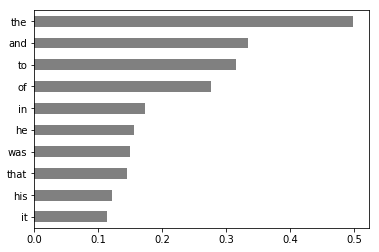

In [15]:
%matplotlib inline

mfw.sort_values().plot.barh(color="grey")

#### Hapax legomena

In corpus linguistics, a hapax legomenon is a word that occurs only once within a context, or in this case in a single text.

In [16]:
corpus.hapax[:10]

["a'mighty",
 "a'n",
 'a-bakin',
 'a-beatin',
 'a-begging',
 'a-bleatin',
 'a-bringin',
 'a-carrying',
 'a-collectin',
 'a-comin']

#### Drop features from document-term matrix

In [17]:
features = corpus.mfw(n=100) + corpus.hapax
print("A total of {} features will be dropped.".format(len(features)))

A total of 16595 features will be dropped.


In [18]:
print("Vocabulary size before: {}".format(corpus.stats["types"]))

Vocabulary size before: 33050


In [19]:
dtm = corpus.drop(dtm=corpus.dtm,
                  features=features)
print("Vocabulary size after: {}".format(dtm.shape[1]))

Vocabulary size after: 16455


#### Culling
Remove features that do not appear in a minimum of documents.

In [20]:
culled = corpus.cull(dtm=corpus.dtm,
                     threshold=5,  # must appear in at least 5 documents
                     keepna=True)
culled.iloc[:3,:10]

,a-going,abandon,abandoned,abated,abhorrence,abide,abilities,ability,able,abode
eb1bee2c-a71a-11e8-b62a-002710199d64,NaN,14.0,1.0,NaN,NaN,NaN,NaN,3.0,45,1.0
eb1bee2d-a71a-11e8-b62a-002710199d64,4.0,3.0,2.0,1.0,1.0,NaN,2.0,1.0,21,2.0
eb1bee2e-a71a-11e8-b62a-002710199d64,NaN,NaN,NaN,2.0,1.0,1.0,1.0,NaN,14,NaN


#### Frequency spectrum

How often does a frequency occur in the corpus?

In [21]:
freq_spectrum = corpus.freq_spectrum[:10]
freq_spectrum

1     12616
2      4508
3      2627
4      1760
5      1253
6      1012
7       863
8       586
9       519
10      467
dtype: int64

Plotting is easy:

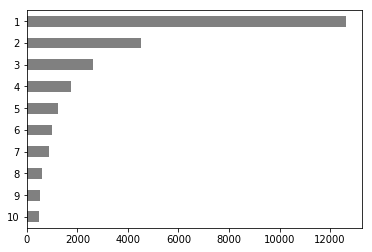

In [22]:
freq_spectrum.sort_values().plot.barh(color="grey")

#### Document-term matrix sorted in descending order

In [23]:
corpus.sort(dtm=corpus.dtm).iloc[:3,:10]

,the,and,to,of,in,he,was,that,his,it
eb1bee2c-a71a-11e8-b62a-002710199d64,6412,4226,5175,4004,2416,3667,2424,3373,2094,1854
eb1bee2d-a71a-11e8-b62a-002710199d64,4918,3706,2928,2642,1909,1387,1194,1389,1079,1464
eb1bee2e-a71a-11e8-b62a-002710199d64,4053,2979,2701,2216,1389,1135,1456,1139,1065,1129


#### Document-term matrix with z-scores

Used formula is: $z_x = \frac{x - \mu}{\sigma}$

In [24]:
corpus.zscores.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
eb1bee2c-a71a-11e8-b62a-002710199d64,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228
eb1bee2d-a71a-11e8-b62a-002710199d64,-0.474342,0.162698,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228
eb1bee2e-a71a-11e8-b62a-002710199d64,1.897367,0.162698,-0.316228,0.621059,-0.316228,-0.316228,2.846050,-0.444478,-0.474342,-0.316228


#### Document-term matrix with TF-IDF scores

Used formula is: $tf-idf_{t,d} \; = \; tf_{t,d} \times idf_t \; = \; tf_{t,d} \times log(\frac{N}{df_t})$

In [25]:
corpus.tfidf.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
eb1bee2c-a71a-11e8-b62a-002710199d64,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
eb1bee2d-a71a-11e8-b62a-002710199d64,0.000000,0.000009,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
eb1bee2e-a71a-11e8-b62a-002710199d64,0.000017,0.000010,0.0,0.000035,0.0,0.0,0.000025,0.0,0.0,0.0


#### Number of tokens by document

In [26]:
corpus.num_tokens

eb1bee2c-a71a-11e8-b62a-002710199d64    149926
eb1bee2d-a71a-11e8-b62a-002710199d64     99570
eb1bee2e-a71a-11e8-b62a-002710199d64     92012
eb1bee2f-a71a-11e8-b62a-002710199d64    127439
eb1bee30-a71a-11e8-b62a-002710199d64     87923
eb1bee31-a71a-11e8-b62a-002710199d64    158439
eb1bee32-a71a-11e8-b62a-002710199d64     97524
eb1bee33-a71a-11e8-b62a-002710199d64    147059
eb1bee34-a71a-11e8-b62a-002710199d64    146348
eb1bee35-a71a-11e8-b62a-002710199d64    203949
dtype: int64

#### Number of types by document

In [27]:
corpus.num_types

eb1bee2c-a71a-11e8-b62a-002710199d64     7845
eb1bee2d-a71a-11e8-b62a-002710199d64     9174
eb1bee2e-a71a-11e8-b62a-002710199d64     8828
eb1bee2f-a71a-11e8-b62a-002710199d64    10357
eb1bee30-a71a-11e8-b62a-002710199d64     7574
eb1bee31-a71a-11e8-b62a-002710199d64    10023
eb1bee32-a71a-11e8-b62a-002710199d64     9298
eb1bee33-a71a-11e8-b62a-002710199d64    10006
eb1bee34-a71a-11e8-b62a-002710199d64     7875
eb1bee35-a71a-11e8-b62a-002710199d64    14225
dtype: int64

#### Get a document by its UUID

In [28]:
uuid = corpus.documents.index[0]  # first document
uuid

'eb1bee2c-a71a-11e8-b62a-002710199d64'

Select it and show its bag-of-words representation:

In [29]:
document = corpus.documents[uuid]
document.bow[:10]

phineas      954
finn         354
by           570
anthony        1
trollope       1
volume         3
chapter       51
dr            29
of          4004
killaloe      33
dtype: int64

Or its tokens:

In [30]:
document.tokens[:10]

['phineas',
 'finn',
 'by',
 'anthony',
 'trollope',
 'volume',
 'chapter',
 'dr',
 'finn',
 'of']

#### Get token lengths

In [31]:
document.lengths

array([7, 4, 2, ..., 6, 2, 4])

Or the mean token length:

In [32]:
document.lengths.mean()

4.271233808678948

#### Sliding window

You can iterate with a sliding window over your document:

In [33]:
for chunk in document.window(size=10):
    print(chunk)
    break

['phineas', 'finn', 'by', 'anthony', 'trollope', 'volume', 'chapter', 'dr', 'finn', 'of']


#### Get paragraphs or segments

In [34]:
paragraphs = list(document.paragraphs(sep="\n"))
segments = list(document.segments(size=1000))

print("There are {} paragraphs.".format(len(paragraphs)))
print("And {} segments, 1000 tokens each segment.".format(len(segments)))
print("First paragraph: {}".format(paragraphs[0]))

There are 13684 paragraphs.
And 150 segments, 1000 tokens each segment.
First paragraph: PHINEAS FINN


#### Complexity metrics

There are a plenty of complexity metrics for measuring lexical richness (adapted from [here](https://github.com/tsproisl/Linguistic_and_Stylistic_Complexity)).


Measures that use sample size and vocabulary size:

  * Type-token ratio
  * Guiraud’s $R$
  * Herdan’s $C$
  * Dugast’s $k$
  * Maas’ $a^2$
  * Dugast’s $U$
  * Tuldava’s $LN$
  * Brunet’s $W$
  * Carroll’s $CTTR$
  * Summer’s $S$

Measures that use part of the frequency spectrum:

  * Honoré’s $H$
  * Sichel’s $S$
  * Michéa’s $M$

Measures that use the whole frequency spectrum:

  * Entropy
  * Yule’s $K$
  * Simpson’s $D$
  * Herdan’s $V_m$

Parameters of probabilistic models:

  * Orlov’s $Z$


You can access them for the _whole corpus_ using the corresponding attributes:

In [35]:
corpus.ttr

0.025225368248397752

Or by _document_ using the `complexity()` method. You _have_ to use a sliding window in this case.

In [36]:
sttr = corpus.complexity(measure="ttr", window=2000)

Of course you can also map metadata here again:

In [37]:
sttr = corpus.map_metadata(sttr, metadata)
sttr

,sttr,ci
trollope_phineas,0.307230,0.004331
dickens_bleak,0.359245,0.007024
eliot_mill,0.365087,0.007684
eliot_adam,0.374310,0.006497
fielding_joseph,0.363512,0.004977
fielding_tom,0.359880,0.004151
thackeray_lyndon,0.378406,0.005436
dickens_david,0.346240,0.003996
trollope_prime,0.313212,0.004565
thackeray_vanity,0.388614,0.003362


And visualize the result e.g. as a barplot:

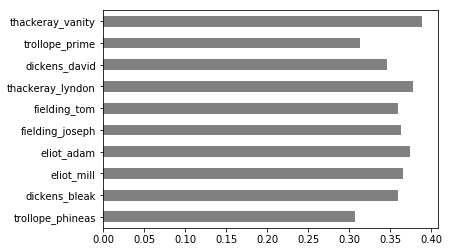

In [38]:
sttr["sttr"].plot.barh(color="grey")

#### Going back to the document level

The complexity measures can be accessed via the `Corpus` object as well as via a `Document` object – even more flexible in the case of `Document`, e.g. using the `bootstrap()` method:

In [39]:
results = list(document.bootstrap(measure="ttr", window=2000))

print("These are the TTRs of the first 10 windows: {}".format(results[:10]))

These are the TTRs of the first 10 windows: [0.327, 0.312, 0.33, 0.3185, 0.3195, 0.3215, 0.3125, 0.3115, 0.315, 0.307]


If you put those in a pandas `Series`, you could plot them and see how the TTRs differ over the document:

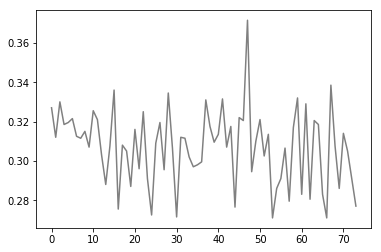

In [40]:
import pandas as pd

pd.Series(results).plot.line(color="grey")

## Low-level model classes

The `cophi.corpus()` function wraps three classes:

1. `Textfile` models a document on the file level.
2. `Document` models a document on the text level.
3. `Corpus` models a collection of documents on the corpus level.

### Textfile

In [41]:
file = "/home/severin/kafka_derprozeß.xml"

In [42]:
f = cophi.Textfile(filepath=file,
                   treat_as=".xml")

In [43]:
f.title

'kafka_derprozeß'

In [44]:
f.suffix

'.xml'

In [45]:
f.parent

'/home/severin'

In [46]:
f.content.strip()[:10]

'Der Prozeß'

#### Context-manager

In [47]:
with cophi.Textfile(file, treat_as=".xml") as document:
    print(f"First 10 characters of '{document.title + document.suffix}', treated as XML: \n{document.content.strip()[:10]}")

First 10 characters of 'kafka_derprozeß.xml', treated as XML: 
Der Prozeß


In [48]:
with cophi.Textfile(file, treat_as=".txt") as document:
    print(f"First 39 characters of '{document.title + document.suffix}', treated as plain text: \n{document.content.strip()[:39]}")

First 39 characters of 'kafka_derprozeß.xml', treated as plain text: 
<?xml version="1.0" encoding="UTF-8"?>



#### Processing XML

In [49]:
from lxml import etree

tree = f.parse_xml(parser=etree.XMLParser())
tree

In [50]:
tree.xpath("tei:text//text()", namespaces={"tei": "http://www.tei-c.org/ns/1.0"})[31]

'Jemand mußte Josef K. verleumdet haben, denn ohne daß er etwas Böses getan hätte, wurde er eines Morgens verhaftet. Die Köchin der Frau Grubach, seiner Zimmervermieterin, die ihm jeden Tag gegen acht Uhr früh das Frühstück brachte, kam diesmal nicht. Das war noch niemals geschehen. K. wartete noch ein Weilchen, sah von seinem Kopfkissen aus die alte Frau, die ihm gegenüber wohnte und die ihn mit einer an ihr ganz ungewöhnlichen Neugierde beobachtete, dann aber, gleichzeitig befremdet und hungrig, läutete er. Sofort klopfte es und ein Mann, den er in dieser Wohnung noch niemals gesehen hatte, trat ein. Er war schlank und doch fest gebaut, er trug ein anliegendes schwarzes Kleid, das, ähnlich den Reiseanzügen, mit verschiedenen Falten, Taschen, Schnallen, Knöpfen und einem Gürtel versehen war und infolgedessen, ohne daß man sich darüber klar wurde, wozu es dienen sollte, besonders praktisch erschien. »Wer sind Sie?« fragte K. und saß gleich halb aufrecht im Bett. Der Mann aber ging über

#### Use case: Segmenting and tokenizing a textfile

Construct a `Document` object:

In [51]:
d = cophi.Document(text=f.content)

Segmenting the document:

In [52]:
segments = list(d.segments(size=1000))
print("{} segments in '{}'.".format(len(segments), f.title))

71 segments in 'kafka_derprozeß'.


Creating labels for the segment:

In [53]:
labels = ["{}_{}".format(f.title, n) for n in range(len(segments))]

In [54]:
pd.Series(segments, index=labels).head(10)

kafka_derprozeß_0    [der, prozeß, hdl, de, textgrid:qmx, der, anno...
kafka_derprozeß_1    [vielleicht, noch, besaß, schätzte, er, nicht,...
kafka_derprozeß_2    [worte, die, ich, mit, einem, mir, ebenbürtige...
kafka_derprozeß_3    [gehen, pflegte, spät, nach, hause, kam, und, ...
kafka_derprozeß_4    [er, dann, hinüber, die, drei, wichen, auch, s...
kafka_derprozeß_5    [mann, aufmerksam, machte, den, er, selbst, sc...
kafka_derprozeß_6    [ja, bloß, die, vermieterin, nun, ich, habe, a...
kafka_derprozeß_7    [fenster, lag, und, die, müden, augen, drückte...
kafka_derprozeß_8    [den, leib, schickt, da, sie, aber, doch, frei...
kafka_derprozeß_9    [hat, eine, größere, summe, von, mir, geliehen...
dtype: object

## Low-level helper functions

#### Tokenization

In [55]:
tokens = cophi.utils.find_tokens(document="Jemand mußte Josef K. verleumdet haben.",
                                 token_pattern="\w+",
                                 maximum=4)

print("The return value is a {}.".format(type(tokens)))
print("Use it e.g. as a list: list(tokens) -> {}".format(list(tokens)))
print("Note that it stopped tokenizing after 4 words (because you set maximum=4).")

The return value is a <class 'generator'>.
Use it e.g. as a list: list(tokens) -> ['Jemand', 'mußte', 'Josef', 'K']
Note that it stopped tokenizing after 4 words (because you set maximum=4).


#### Constructing ngrams

In [56]:
bigrams = cophi.utils.construct_ngrams(tokens=['Jemand', 'mußte', 'Josef', 'K'],
                                       n=2,
                                       sep=" ")
print("The return value is also a {}.".format(type(bigrams)))
print("You can use it as a list, too: list(bigrams) -> {}".format(list(bigrams)))

The return value is also a <class 'generator'>.
You can use it as a list, too: list(bigrams) -> ['Jemand mußte', 'mußte Josef', 'Josef K']
